In [357]:
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

In [358]:
rows, columns = 4, 5

In [359]:
hconnections = np.pad(np.random.random((rows, columns - 1)), ((0, 0), (1, 1)), mode="constant", constant_values=0)
vconnections = np.pad(np.random.random((rows - 1, columns)), ((1, 1), (0, 0)), mode="constant", constant_values=0)

In [360]:
tiles = np.stack((
    vconnections[:-1, :],
    hconnections[:, 1:],
    vconnections[1:, :],
    hconnections[:, :-1],
)).transpose((1, 2, 0))

In [361]:
vertex_labels = np.arange(rows * columns * 4).reshape((rows, columns, 4))

In [362]:
offset = 0.25

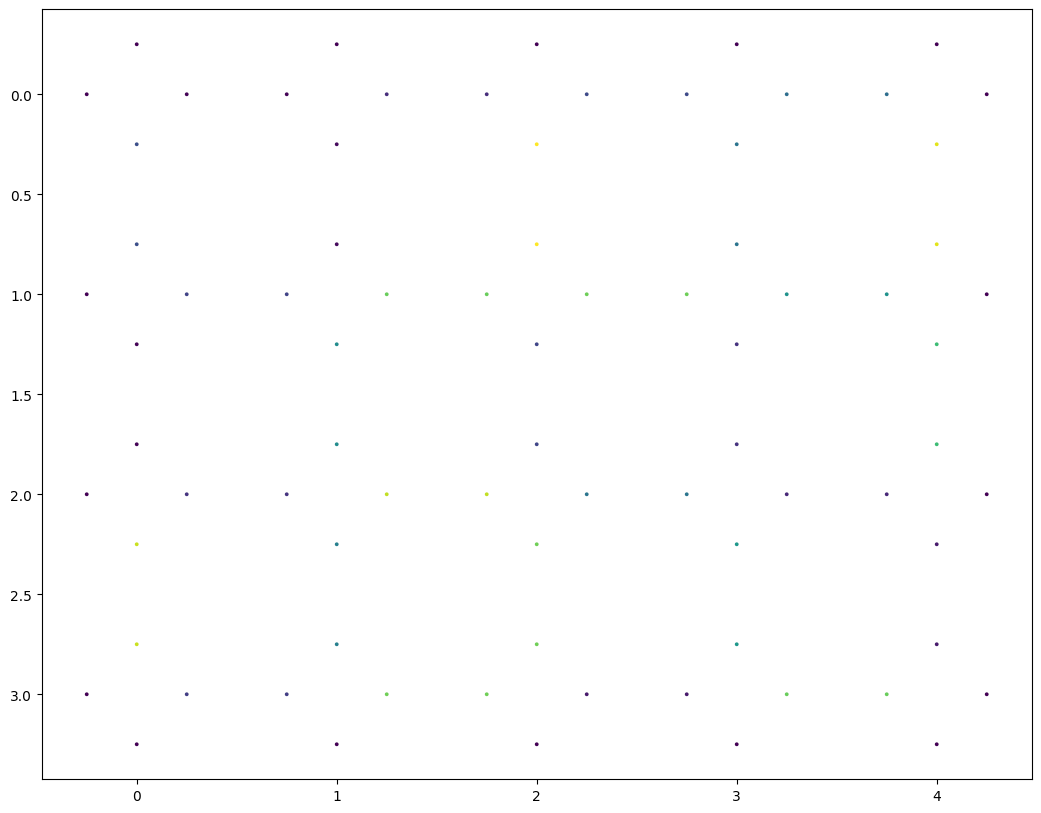

In [363]:
fig, ax = plt.subplots(figsize=(20, 10))

norm = plt.Normalize(np.min(tiles), np.max(tiles))

ax.scatter(
    np.tile(np.repeat(range(columns), 4), rows) + np.tile((0, offset, 0, -offset), rows * columns),
    np.repeat(range(rows), 4 * columns) + np.tile((-offset, 0, offset, 0), rows * columns),
    s=3,
    c=tiles.flatten(),
    cmap="viridis",
    norm=norm,
)

ax.invert_yaxis()
ax.set_aspect(1)
# smap = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
# fig.colorbar(smap, ax=ax)

In [364]:
label_mapping = {}
for row in range(rows):
    for col in range(columns):
        for i, row_off, col_off in zip(range(4), (-offset, 0, offset, 0), (0, offset, 0, - offset)):
            label_mapping[vertex_labels[row, col, i]] = (row + row_off, col + col_off)

In [365]:
k = 5

In [366]:
def stuple(values):
    return tuple(sorted(values))

In [367]:
vertex_labels.shape

(4, 5, 4)

In [368]:
edges = []
for row_idx in range(1, rows - 1):
    edges.append(stuple((vertex_labels[row_idx, 0, 1], vertex_labels[row_idx, 1, 3])))
    edges.append(stuple((vertex_labels[row_idx, -1, 3], vertex_labels[row_idx, -2, 1])))

for col_idx in range(1, columns - 1):
    edges.append(stuple((vertex_labels[0, col_idx, 2], vertex_labels[1, col_idx, 0])))
    edges.append(stuple((vertex_labels[-1, col_idx, 0], vertex_labels[-2, col_idx, 2])))

In [369]:
tile_ids = np.repeat(np.arange(rows * columns).reshape(rows, columns)[:, :, np.newaxis], 4, axis=2)

In [370]:
rotation_order = np.tile(np.arange(4), rows * columns).reshape(rows, columns, 4)

In [371]:
vertex_tile_lookup = {label: tile_id for label, tile_id in zip(vertex_labels.flatten(), tile_ids.flatten())}
rotation_order_lookup = {label: ro for label, ro in zip(vertex_labels.flatten(), rotation_order.flatten())}

In [372]:
tile_vertex_lookup = defaultdict(list)
for vertex_id, tile_id in vertex_tile_lookup.items():
    tile_vertex_lookup[tile_id].append(vertex_id)

In [373]:
flabels = vertex_labels[1:-1, 1:-1].flatten()
fvalues = tiles[1:-1, 1:-1].flatten()

for label, value in zip(flabels, fvalues):
    order = np.argsort(np.abs(fvalues - value))
    kneighbors = flabels[order][flabels[order] // 4 != label // 4][:k]
    edges.extend([stuple([label, nlabel]) for nlabel in kneighbors])

In [374]:
edges = list(set(edges))

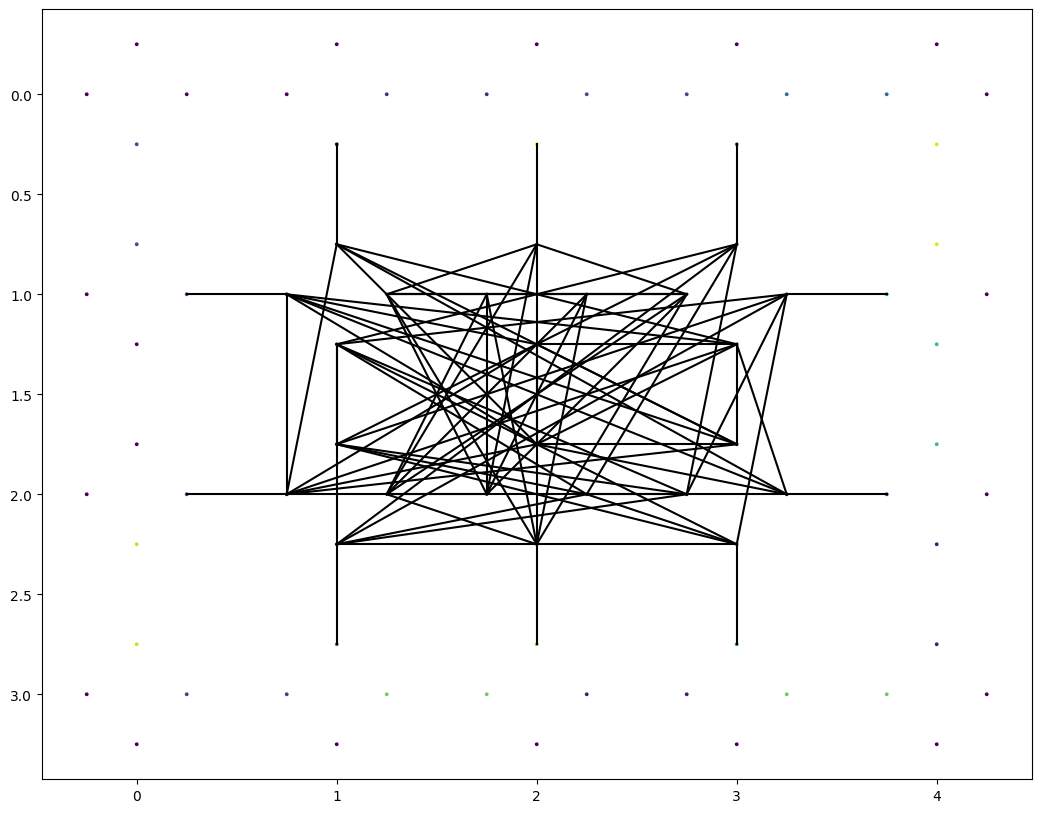

In [375]:
fig, ax = plt.subplots(figsize=(20, 10))

norm = plt.Normalize(np.min(tiles), np.max(tiles))

ax.scatter(
    np.tile(np.repeat(range(columns), 4), rows) + np.tile((0, offset, 0, -offset), rows * columns),
    np.repeat(range(rows), 4 * columns) + np.tile((-offset, 0, offset, 0), rows * columns),
    s=3,
    c=tiles.flatten(),
    cmap="viridis",
    norm=norm,
)

for e in edges[:1_000]:
    ax.plot(
        [label_mapping[e[0]][1], label_mapping[e[1]][1]],
        [label_mapping[e[0]][0], label_mapping[e[1]][0]],
        c="black",
    )

ax.invert_yaxis()
ax.set_aspect(1)

In [376]:



# offset = 0.25
# fig, ax = plt.subplots(figsize=(20, 10))

# norm = plt.Normalize(np.min(tiles), np.max(tiles))

# for row in range(rows):
#     for col in range(columns):
#         for i, row_off, col_off in zip(range(4), (-offset, 0, offset, 0), (0, offset, 0, - offset)):
#             ax.scatter(col + col_off, row + row_off, s=500, c=tiles[row, col, i], cmap="viridis", norm=norm)
#             ax.text(col + col_off, row + row_off, vertex_labels[row, col, i])
#         # ax.text(col, row, vertex_labels[row, col])

# for e in edges:
#     ax.plot([label_mapping[e[0]][1], label_mapping[e[1]][1]], [label_mapping[e[0]][0], label_mapping[e[1]][0]], c="black")

# ax.invert_yaxis()
# smap = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
# ax.set_aspect(1)
# fig.colorbar(smap, ax=ax)

In [377]:
import networkx as nx

In [378]:
g = nx.Graph()

In [379]:
g.add_edges_from(edges)

In [380]:
matching = nx.max_weight_matching(g, maxcardinality=True)

In [381]:
len(matching)

17

In [382]:
matching = list(matching)

In [383]:
vertex_tile_lookup[10]

2

In [384]:
tile_vertex_lookup[2]

[8, 9, 10, 11]

In [385]:
match_lookup

{64: 46,
 49: 55,
 44: 26,
 33: 39,
 45: 52,
 34: 51,
 14: 32,
 21: 27,
 35: 29,
 24: 6,
 30: 48,
 31: 25,
 59: 53,
 41: 47,
 10: 28,
 68: 50,
 72: 54,
 46: 64,
 55: 49,
 26: 44,
 39: 33,
 52: 45,
 51: 34,
 32: 14,
 27: 21,
 29: 35,
 6: 24,
 48: 30,
 25: 31,
 53: 59,
 47: 41,
 28: 10,
 50: 68,
 54: 72}

In [386]:
match_lookup = {src: tgt for src, tgt in matching}
match_lookup.update({tgt: src for src, tgt in matching})

In [387]:
ROTATIONS = ["N", "O", "S", "W"]

CONNECTORS = {
    "N": "S",
    "S": "N",
    "W": "O",
    "O": "W",
}

INDEX_OF_ = {
    "N": 0,
    "O": 1,
    "S": 2,
    "W": 3,
}

In [388]:
def rotate(l, n):
    return l[n:] + l[:n]

In [389]:
stack = [64]
visited = set()
vertex_orientation = {stack[0]: "N"}
visited_edges = []

checked_edges = 0

In [ ]:
def find_path(edge_list, start, target):
    path = [start]
    current_v = start
    while current_v != target:
        next_v = match_lookup[current_v]

In [395]:
visited_edges

[(64, 46),
 (44, 26),
 (45, 29),
 (47, 41),
 (24, 6),
 (25, 35),
 (27, 21),
 (28, 10),
 (30, 48),
 (31, 51),
 (32, 14),
 (33, 39),
 (34, 52),
 (49, 55),
 (50, 68)]

In [396]:
gpth = nx.Graph()
for src, tgt in visited_edges[:-1]:
    if sorted((src, tgt)) != [31, 51]:
        gpth.add_edge(vertex_tile_lookup[src], vertex_tile_lookup[tgt])

In [397]:
gpth.nodes

NodeView((16, 11, 6, 7, 10, 1, 8, 5, 2, 12, 3, 9, 13))

In [398]:
path = nx.shortest_path(gpth, vertex_tile_lookup[31], vertex_tile_lookup[51])

In [399]:
path

[7, 12]

In [335]:
tile_vertex_lookup[path[0]]

[48, 49, 50, 51]

In [337]:
match_lookup[49]

55

In [338]:
tile_vertex_lookup

[]

In [341]:
path_ext = []

for i in range(len(path) - 1):
    found_ = False
    for candidate in tile_vertex_lookup[path[i]]:
        if vertex_tile_lookup[match_lookup[candidate]] == path[i+1]:
            path_ext.append((candidate, match_lookup[candidate]))
            found_ = True
            break
    assert found_

In [342]:
path_ext

[(49, 55), (52, 45), (44, 26), (25, 31)]

In [319]:
visited_edges

[(64, 46),
 (44, 26),
 (45, 52),
 (47, 41),
 (24, 6),
 (25, 31),
 (27, 21),
 (53, 59),
 (54, 72),
 (55, 49),
 (28, 10),
 (29, 35),
 (30, 48)]

In [390]:
while len(stack) > 0:
    current_v = stack[0]
    tile_id = vertex_tile_lookup[current_v]
    tile_vertices = tile_vertex_lookup[tile_id]
    tile_vertices = sorted(tile_vertices, key=lambda x: rotation_order_lookup[x])

    visited.add(tile_id)
    current_orientation = vertex_orientation[current_v]

    rot = rotate(ROTATIONS, INDEX_OF_[current_orientation] - tile_vertices.index(current_v))

    for v, r in zip(tile_vertices, rot):
        vertex_orientation[v] = r

        tgt = match_lookup.get(v, None)
        if tgt is not None:
            next_tile = vertex_tile_lookup[tgt]
            if next_tile in visited:
                assert CONNECTORS[r] == vertex_orientation[tgt]
            else:
                stack.append(tgt)
                visited_edges.append((v, tgt))
                vertex_orientation[tgt] = CONNECTORS[r]
        if v in stack:
            stack.remove(v)


    # del stack[0]

AssertionError: 

In [392]:
v

51

In [393]:
tgt

31

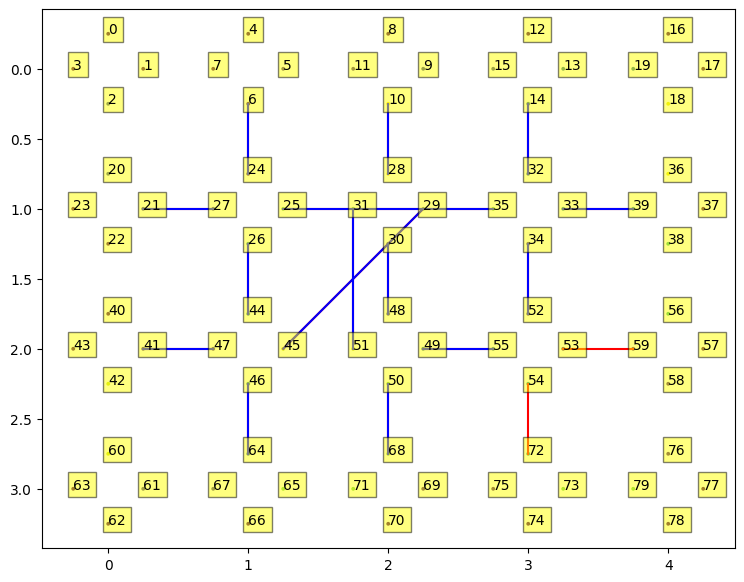

In [391]:
fig, ax = plt.subplots(figsize=(10, 7))

norm = plt.Normalize(np.min(tiles), np.max(tiles))

vx = np.tile(np.repeat(range(columns), 4), rows) + np.tile((0, offset, 0, -offset), rows * columns)
vy = np.repeat(range(rows), 4 * columns) + np.tile((-offset, 0, offset, 0), rows * columns)

ax.scatter(
    vx,
    vy,
    s=3,
    c=tiles.flatten(),
    cmap="viridis",
    norm=norm,
)

for i in range(len(vx)):
    ax.text(vx[i], vy[i], i, bbox=dict(facecolor="yellow",alpha=0.5))

for e in matching:
    ax.plot(
        [label_mapping[e[0]][1], label_mapping[e[1]][1]],
        [label_mapping[e[0]][0], label_mapping[e[1]][0]],
        c="red",
    )
for e in visited_edges:
    ax.plot(
        [label_mapping[e[0]][1], label_mapping[e[1]][1]],
        [label_mapping[e[0]][0], label_mapping[e[1]][0]],
        c="blue",
    )

ax.invert_yaxis()
ax.set_aspect(1)

In [ ]:
def get_cycles()

In [277]:
stack

[49, 10, 35, 48]

In [249]:
visited

{16}

In [310]:
vertex_orientation

{64: 'N',
 46: 'S',
 65: 'O',
 66: 'S',
 67: 'W',
 44: 'N',
 26: 'S',
 45: 'O',
 52: 'W',
 47: 'W',
 41: 'O',
 24: 'N',
 6: 'S',
 25: 'O',
 31: 'W',
 27: 'W',
 21: 'O',
 53: 'N',
 59: 'S',
 54: 'O',
 72: 'W',
 55: 'S',
 49: 'N',
 40: 'N',
 42: 'S',
 43: 'W',
 4: 'N',
 5: 'O',
 7: 'W',
 28: 'N',
 10: 'S',
 29: 'O',
 35: 'W',
 30: 'S',
 48: 'N'}

In [140]:
# Goal: Rotate to have W at pos 2
# W is at pos 3 -> rotate -3 to get it at pos 0
# rotate 2 times to get it at pos 2

# Goal: Rotate to have N at pos 2
# N is at pos 0 -> rotate -0 to get it at 0
# rotate it 2 times to get it at post 2

In [154]:
rot

['N', 'O', 'S', 'W']

In [127]:
ROTATIONS

['N', 'O', 'S', 'W']

In [138]:
rotate(ROTATIONS, -1)

['W', 'N', 'O', 'S']

In [114]:
sorted(tile_vertices, key=lambda x: rotation_order_lookup[x])

[64, 65, 66, 67]

In [107]:
matching

[(64, 46),
 (49, 55),
 (44, 26),
 (33, 39),
 (45, 52),
 (34, 51),
 (14, 32),
 (21, 27),
 (35, 29),
 (24, 6),
 (30, 48),
 (31, 25),
 (59, 53),
 (41, 47),
 (10, 28),
 (68, 50),
 (72, 54)]

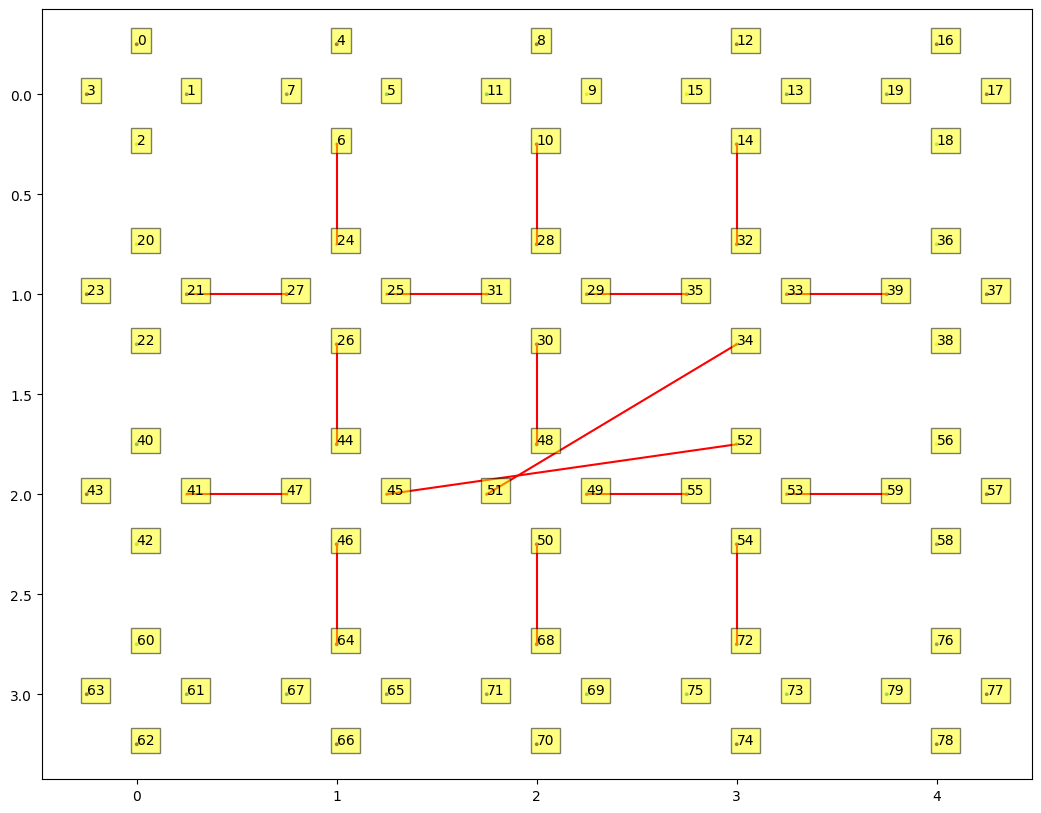

In [106]:
fig, ax = plt.subplots(figsize=(20, 10))

norm = plt.Normalize(np.min(tiles), np.max(tiles))

vx = np.tile(np.repeat(range(columns), 4), rows) + np.tile((0, offset, 0, -offset), rows * columns)
vy = np.repeat(range(rows), 4 * columns) + np.tile((-offset, 0, offset, 0), rows * columns)

ax.scatter(
    vx,
    vy,
    s=3,
    c=tiles.flatten(),
    cmap="viridis",
    norm=norm,
)

for i in range(len(vx)):
    ax.text(vx[i], vy[i], i, bbox=dict(facecolor="yellow",alpha=0.5))

for e in matching:
    ax.plot(
        [label_mapping[e[0]][1], label_mapping[e[1]][1]],
        [label_mapping[e[0]][0], label_mapping[e[1]][0]],
        c="red",
    )

ax.invert_yaxis()
ax.set_aspect(1)

In [400]:
import pyomo.environ as pyo

In [401]:
vertex_edge_mapping = defaultdict(list)

for i, (src, tgt) in enumerate(edges):
    vertex_edge_mapping[src].append(i)
    vertex_edge_mapping[tgt].append(i)

In [402]:
vertex_index_mapping = {v: i for i, v in enumerate(vertex_edge_mapping.keys())}

In [443]:
randdd = np.random.permutation(list(vertex_edge_mapping.items()))

/var/folders/xc/gg95jg7j1z94g_qds0gqpxxc0000gn/T/ipykernel_935/1574609685.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  randdd = np.random.permutation(list(vertex_edge_mapping.items()))


In [482]:
model = pyo.ConcreteModel()
model.x = pyo.Var(range(len(edges)), domain=pyo.Binary)
# model.vl1 = pyo.Var(range(len(vertex_index_mapping)), domain=pyo.NonNegativeIntegers)
# model.vl2 = pyo.Var(range(len(vertex_index_mapping)), domain=pyo.NonNegativeIntegers)

# model.h = pyo.Var(range(len(edges)), domain=pyo.Integers)
# model.hp = pyo.Var(range(len(edges)), domain=pyo.NonNegativeIntegers)
# model.hn = pyo.Var(range(len(edges)), domain=pyo.NonPositiveIntegers)

# model.OBJ = pyo.Objective(expr=pyo.summation(model.hp) - pyo.summation(model.hn))
model.obj = pyo.Objective(expr=1)

In [483]:
model.matching_constraints = pyo.ConstraintList()
for v, adj_edges in randdd:
    lhs = 0
    for e in adj_edges:
        lhs += model.x[e]
    model.matching_constraints.add(lhs == 1)

model.same_tile_constr = pyo.ConstraintList()
for e1, e2 in same_tile_constr:
    idx1 = edges.index(e1)
    idx2 = edges.index(e2)

    model.same_tile_constr.add(model.x[idx1] + model.x[idx2] <= 1)

    

# model.neighbor_constraints = pyo.ConstraintList()
# for i, (src, tgt) in enumerate(edges):
#     src_idx = vertex_index_mapping[src]
#     tgt_idx = vertex_index_mapping[tgt]

#     c1p = model.x[i] * (model.vl1[src_idx] - model.vl1[tgt_idx]) <= 1
#     c1n = model.x[i] * (model.vl1[src_idx] - model.vl1[tgt_idx]) >= -1
#     c2p = model.x[i] * (model.vl2[src_idx] - model.vl2[tgt_idx]) <= 1
#     c2n = model.x[i] * (model.vl2[src_idx] - model.vl2[tgt_idx]) >= -1

#     h1 = model.x[i] * ((model.vl1[src_idx] - model.vl1[tgt_idx]) + (model.vl2[src_idx] - model.vl2[tgt_idx])) == model.h[i]
#     h2 = model.h[i] == model.hp[i] + model.hn[i]

#     c3 = (model.hp[i] - model.hn[i]) == 1
    
#     for constr in (c1p, c1n, c2p, c2n, h1, h2):
#         model.neighbor_constraints.add(constr)
    

In [484]:
opt = pyo.SolverFactory('glpk')
solution = opt.solve(model)

    solver failure.


In [485]:
solution

{'Problem': [{'Name': 'unknown', 'Lower bound': 1.0, 'Upper bound': 1.0, 'Number of objectives': 1, 'Number of constraints': 37, 'Number of variables': 81, 'Number of nonzeros': 165, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '1', 'Number of created subproblems': '1'}}, 'Error rc': 0, 'Time': 0.03636598587036133}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [486]:
solution = [bool(model.x[i].value) for i in range(len(edges))]

In [487]:
solution_edges = np.array(edges)[solution]

In [488]:
len(solution_edges)

17

In [462]:
solution_lookup = {src: tgt for src, tgt in solution_edges}
solution_lookup.update({tgt: src for src, tgt in solution_edges})

In [463]:
import itertools

In [465]:
solution_lookup[v1]

KeyError: 0

In [478]:
same_tile_constr = set()
for tile_id, verticexx in tile_vertex_lookup.items():
    for v1, v2 in itertools.combinations(verticexx, 2):
        if v1 in solution_lookup and v2 in solution_lookup:
            if vertex_tile_lookup[solution_lookup[v1]] == vertex_tile_lookup[solution_lookup[v2]]:
                same_tile_constr.add(stuple((stuple((v1, solution_lookup[v1])), stuple((v2, solution_lookup[v2])))))
same_tile_constr = list(same_tile_constr)

In [479]:
same_tile_constr

[((44, 49), (45, 51)), ((29, 35), (30, 34))]

In [480]:
edges.index(same_tile_constr[0][0])

15

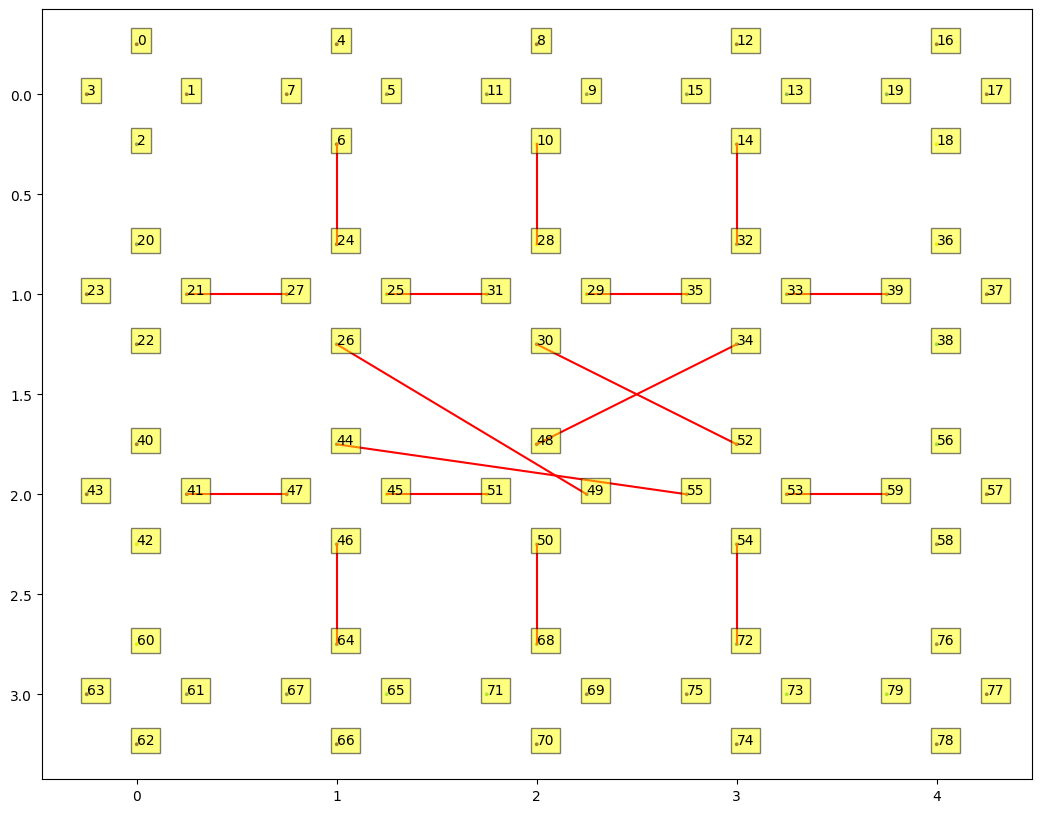

In [489]:
fig, ax = plt.subplots(figsize=(20, 10))

norm = plt.Normalize(np.min(tiles), np.max(tiles))

vx = np.tile(np.repeat(range(columns), 4), rows) + np.tile((0, offset, 0, -offset), rows * columns)
vy = np.repeat(range(rows), 4 * columns) + np.tile((-offset, 0, offset, 0), rows * columns)

ax.scatter(
    vx,
    vy,
    s=3,
    c=tiles.flatten(),
    cmap="viridis",
    norm=norm,
)

for i in range(len(vx)):
    ax.text(vx[i], vy[i], i, bbox=dict(facecolor="yellow",alpha=0.5))

for e in solution_edges:
    ax.plot(
        [label_mapping[e[0]][1], label_mapping[e[1]][1]],
        [label_mapping[e[0]][0], label_mapping[e[1]][0]],
        c="red",
    )

ax.invert_yaxis()
ax.set_aspect(1)

In [420]:
dic = {1: 2, 3: 4, 5: 6, 7: 8}

In [421]:
np.random.permutation(list(dic.items()))

array([[3, 4],
       [5, 6],
       [7, 8],
       [1, 2]])

In [418]:
dic.items()

dict_items([(1, 2), (3, 4)])